# Estadistica Aplicada
## Ricardo de Jesús Cervantes García 1958971
## 23 de octubre

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import pmdarima as pm

In [3]:
desempleo=pd.read_excel('desempleo_mex.xlsx')

In [4]:
desempleo.isnull().sum()

meses                0
tasa de desempleo    0
dtype: int64

In [5]:
desempleo['meses']=pd.to_datetime(desempleo['meses'],format='%Y/%m')

In [6]:
desempleo=desempleo.set_index('meses')
desempleo=desempleo.asfreq('MS')

In [7]:
prueba_adf=adfuller(desempleo['tasa de desempleo'])
pvalue=prueba_adf[1]
pvalue.round(2)

0.25

No rechazamos H0, significa que la tasa desempleoes un proceso no estacionario

In [8]:
desempleo['diff']=desempleo['tasa de desempleo'].diff()

In [9]:
prueba_adf1=adfuller(desempleo['diff'].dropna())
pvalue1=prueba_adf1[1]
pvalue1.round(2)

0.01

rechazamos H0 son un proceso estacioanrio

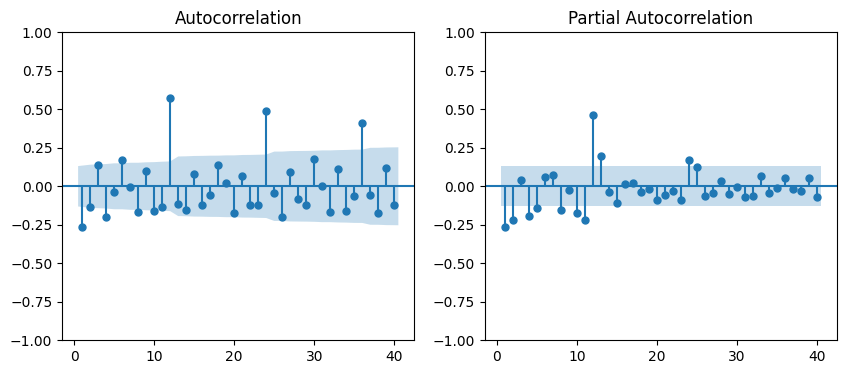

In [10]:
ig,ax=plt.subplots(1,2,figsize=(10,4))
plot_acf(desempleo['diff'].dropna(),zero=False,lags=40,ax=ax[0])
plot_pacf(desempleo['diff'].dropna(),zero=False,lags=40,ax=ax[1])
plt.show()

In [12]:
pm.auto_arima(desempleo['tasa de desempleo'],start_p=1,max_p=7,start_q=1, max_q=7,ic='aic',seasonal=True,m=12,star_Q=1, max_P=7,start_P=1, max_Q=7)

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [13]:
model=ARIMA(desempleo['tasa de desempleo'],order=(1,1,0),seasonal_order=(1,0,1,12))
results=model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  tasa de desempleo   No. Observations:                  224
Model:             ARIMA(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 -28.306
Date:                            Thu, 26 Oct 2023   AIC                             64.613
Time:                                    14:26:55   BIC                             78.241
Sample:                                01-01-2005   HQIC                            70.115
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3689      0.061     -6.075      0.000      -0.488      -0.250
ar.S.L12       0.9763      0.014   

<Axes: xlabel='meses'>

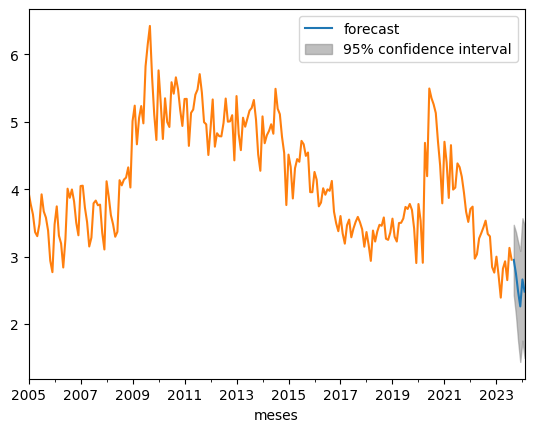

In [14]:
plot_predict(results,'2023-09-01','2024-02-01')
desempleo['tasa de desempleo'].plot()

In [15]:
forecast=results.get_forecast(steps=6)
forecast_mean=forecast.predicted_mean
forecast_ci=forecast.conf_int()

In [16]:
inicio='2023-09-01'
fin='2024-02-01'

In [19]:
pronostico_valor=forecast_mean[inicio:fin]
pronostico_intervalos=forecast_ci.loc[inicio:fin]

In [21]:
df_pronostico=pd.DataFrame({'pronostico':pronostico_valor,
                            'limite inf':pronostico_intervalos.iloc[:,0],
                            'limite_sup':pronostico_intervalos.iloc[:,1]
})

In [22]:
df_pronostico

,pronostico,limite inf,limite_sup
2023-09-01,2.951735,2.431389,3.472082
2023-10-01,2.750669,2.135374,3.365963
2023-11-01,2.483561,1.750114,3.217009
2023-12-01,2.262441,1.439566,3.085317
2024-01-01,2.661989,1.754471,3.569507
2024-02-01,2.481788,1.498252,3.465324


La tasa de desempleo pronosticado para septiembre de 2023 es 2.95% pero puede estar entre 3.47% y 2.43%